### tensorflow使用图Graph来表示计算任务，并使用会话Session来执行图

### 使用tenforflow输出一句话

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#初始化一个tensorflow常量（定义一个图）
hello = tf.constant('hello deep learning!')
#启动一个会话
sess = tf.Session()
#使用会话执行图计算
res = sess.run(hello)
print(res.decode('utf-8'))
sess.close()

hello deep learning!


### 使用Tensorflow完成一次线性函数的计算

In [3]:
m1 = tf.constant([[3.,3.]])#1*2
m2 = tf.constant([[3.],[5.]])#2*1
res = tf.matmul(m1,m2)
linear = tf.add(res,tf.constant(8.0))

#启动会话
with tf.Session() as sess:
    res = sess.run(linear)
    print(res)

[[ 32.]]


### 使用Tensorflow定义线性分类器，完成“良/恶性乳腺癌肿瘤”的预测功能

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
                'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
                 ,names=column_names)
# 发现虽然没有nan的数据，但是看到有？的数据。把？的数据替换为标准缺失值表示nan
df = df.replace(to_replace="?",value=np.nan)
#丢掉数据，策略是一行中只要有一个位nan就丢弃整行，还有一种策略是设置为all，整行都为nan才丢弃
df.dropna(how='any',inplace=True)
train,test = train_test_split(df,test_size=0.25,random_state = 123)

D:\softwares\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#分割特征与分类目标
X_train = np.float32(train[['Clump Thickness','Uniformity of Cell Size']].T)
Y_train = np.float32(train['Class'].T)

X_test = np.float32(test[['Clump Thickness','Uniformity of Cell Size']].T)
Y_test = np.float32(test['Class'].T)

In [6]:
#定义一个tensorflow变量，作为线性模型的截距
b = tf.Variable(tf.zeros([1]))

In [7]:
#定义一个tensorflow变量W作为线性模型的系数，设置为-1到1之间的均匀分布随机数
W = tf.Variable(tf.random_uniform([1,2],-1.0,1.0))

In [8]:
#定义这个线性代数
y = tf.matmul(W,X_train) + b

In [9]:
#使用tensorflow中的reduce_mean取得训练集上的均方误差
loss = tf.reduce_mean(tf.square(y - Y_train))

In [10]:
#使用梯度下降法估计参数W、b，并设置迭代步长为0.01,与scikit-learn中的SGDRegressor类似
optimizer = tf.train.GradientDescentOptimizer(0.01)

In [11]:
#以最小二乘损失为优化目标
train = optimizer.minimize(loss)


In [21]:
#初始化所有变量
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
#开启会话
sess = tf.Session()

In [23]:
#执行变量初始化操作
sess.run(init)

In [24]:
#迭代500次，训练参数
for i in np.arange(5000):
    sess.run(train)
    if(i % 500 ==0):
        print(i,sess.run(W),sess.run(b))

0 [[-0.46010095  1.1072762 ]] [ 0.06928917]
500 [[ 0.12633613  0.190065  ]] [ 1.52036965]
1000 [[ 0.11335963  0.18999504]] [ 1.59974027]
1500 [[ 0.11257986  0.18999083]] [ 1.60450971]
2000 [[ 0.1125332   0.18999061]] [ 1.60479498]
2500 [[ 0.11253165  0.18999058]] [ 1.60480452]
3000 [[ 0.11253165  0.18999058]] [ 1.60480452]
3500 [[ 0.11253165  0.18999058]] [ 1.60480452]
4000 [[ 0.11253165  0.18999058]] [ 1.60480452]
4500 [[ 0.11253165  0.18999058]] [ 1.60480452]


In [25]:
test_negetive = test.loc[test['Class']==2][['Clump Thickness','Uniformity of Cell Size']]
test_positive = test.loc[test['Class']==4][['Clump Thickness','Uniformity of Cell Size']]

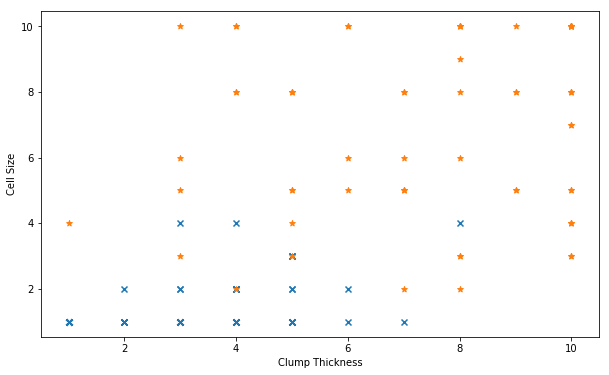

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(test_negetive['Clump Thickness'],test_negetive['Uniformity of Cell Size'],marker='x')
plt.scatter(test_positive['Clump Thickness'],test_positive['Uniformity of Cell Size'],marker='*')
plt.ylabel('Cell Size')
plt.xlabel('Clump Thickness')

lx = np.arange(0,12)
ly = (0.5-sess.run(b) - lx*sess.run(W)[0][0]) / sess.run(W)[0][1]
#plt.plot(lx,ly,color='g')
plt.show()